In [17]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import os
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [9]:
pd.read_csv('aihub_emotion_preprocessed_cleaned.csv')

,wav_id,발화문,final_emotion,1번 감정,1번 감정세기,2번 감정,2번 감정세기,3번 감정,3번 감정세기,4번 감정,4번감정세기,5번 감정,5번 감정세기,나이,성별,source,wav_path,file_exist
0,5e258fd1305bcf3ad153a6a4,"어, 청소 니가 대신 해 줘!",anger,Neutral,0,Angry,1,Neutral,0,Neutral,0,Angry,1,27,male,./4차년도,감정 분류를 위한 대화 음성 데이터셋\./4차년도\5e258fd1305bcf3ad1...,True
1,5e258fe2305bcf3ad153a6a5,둘 다 청소 하기 싫어. 귀찮아.,anger,Neutral,0,Angry,1,Neutral,0,Neutral,0,Angry,1,27,male,./4차년도,감정 분류를 위한 대화 음성 데이터셋\./4차년도\5e258fe2305bcf3ad1...,True
2,5e258ff5305bcf3ad153a6a6,둘 다 하기 싫어서 화내.,anger,Angry,1,Angry,1,Neutral,0,Angry,1,Angry,1,27,male,./4차년도,감정 분류를 위한 대화 음성 데이터셋\./4차년도\5e258ff5305bcf3ad1...,True
3,5e25902f305bcf3ad153a6a9,그럼 방세는 어떡해.,anger,Sadness,1,Sadness,1,Sadness,1,Sadness,1,Sadness,1,27,male,./4차년도,감정 분류를 위한 대화 음성 데이터셋\./4차년도\5e25902f305bcf3ad1...,True
4,5e27fb575807b852d9e01595,어. 고등학교 동창인데 이렇게 더럽게 쓸줄 몰랐어.,anger,Disgust,2,Disgust,1,Angry,1,Disgust,2,Angry,1,32,male,./4차년도,감정 분류를 위한 대화 음성 데이터셋\./4차년도\5e27fb575807b852d9...,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17250,5f6489ced338b948c4e67f96,나 오늘 짭새가 몰려있길래 구경 다녀왔다?,neutral,neutral,0,fear,1,happiness,1,neutral,0,happiness,1,23,female,./5차년도_2차,감정 분류를 위한 대화 음성 데이터셋\./5차년도_2차\5f6489ced338b94...,True
17251,5f653033f8fac448cc0a57f1,나 오늘 짭새가 몰려있길래 궁금해서 구경 다녀왔어.,neutral,neutral,0,fear,1,angry,1,neutral,0,neutral,0,23,female,./5차년도_2차,감정 분류를 위한 대화 음성 데이터셋\./5차년도_2차\5f653033f8fac44...,True
17252,5f6365c13bd6941613f6d70b,우리 집 쓰레기통에서 냄새가 나기 시작했어.,neutral,disgust,2,disgust,2,disgust,2,disgust,1,angry,2,48,female,./5차년도_2차,감정 분류를 위한 대화 음성 데이터셋\./5차년도_2차\5f6365c13bd6941...,True
17253,5f61fdcc54b2361621284bdc,나 지금 배고파.,neutral,neutral,0,angry,1,sadness,1,neutral,0,sadness,1,22,male,./5차년도_2차,감정 분류를 위한 대화 음성 데이터셋\./5차년도_2차\5f61fdcc54b2361...,True


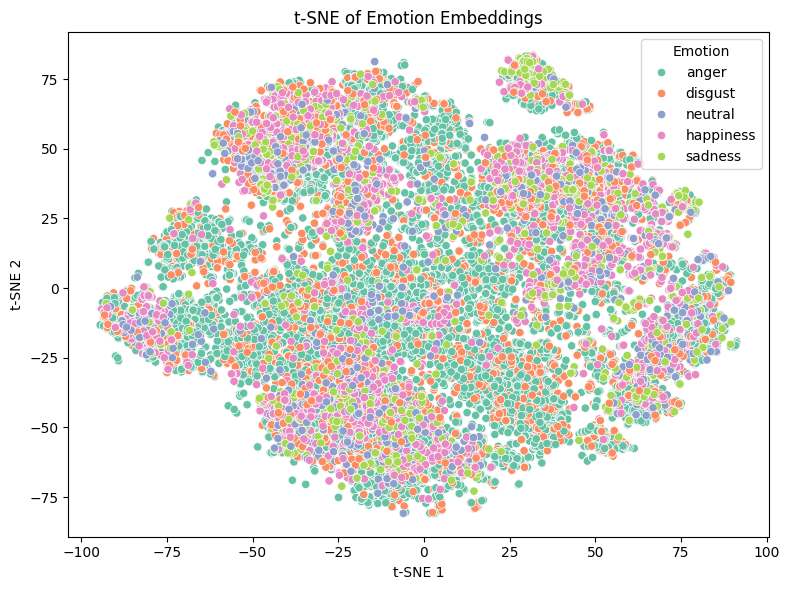

In [18]:
X = np.load("emotion_X.npy")  # 예: Wav2Vec2 임베딩
y = np.load("emotion_y.npy")  # 예: ["Happy", "Sadness", ...]

# t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_2d = tsne.fit_transform(X)

# 시각화
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_2d[:, 0], y=X_2d[:, 1], hue=y, palette="Set2")
plt.title("t-SNE of Emotion Embeddings")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.legend(title="Emotion")
plt.tight_layout()
plt.show()

In [22]:
import os
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 기본 경로 설정
base_dir = "./감정 분류를 위한 대화 음성 데이터셋"
folders = ["4차년도", "5차년도", "5차년도_2차"]
csv_path = "aihub_emotion_preprocessed_cleaned.csv"

# 2. 라벨 CSV 로딩
df = pd.read_csv(csv_path)
df = df.dropna(subset=['filepath'])  # 파일 경로가 없는 경우 제거

# 3. 예시: 슬픔 감정인 샘플 하나 선택
sample_row = df[df['final_emotion'] == '슬픔'].iloc[0]
sample_path = sample_row['filepath']

# 4. 실제 파일 경로 조합
full_path = None
for folder in folders:
    test_path = os.path.join(base_dir, folder, sample_path)
    if os.path.exists(test_path):
        full_path = test_path
        break

if full_path is None:
    raise FileNotFoundError("해당 파일을 폴더에서 찾을 수 없습니다.")

# 5. 오디오 로드 및 MFCC 추출
y, sr = librosa.load(full_path, sr=None)
mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

# 6. 시각화
plt.figure(figsize=(10, 4))
sns.heatmap(mfcc, cmap='viridis')
plt.title(f"MFCC - 감정: {sample_row['final_emotion']}")
plt.xlabel("Time Frames")
plt.ylabel("MFCC Coefficients")
plt.tight_layout()
plt.show()

KeyError: ['filepath']

In [ ]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import pandas as pd

# 경로 설정
base_dir = "D:/pyhon-workspace/soundofmind/감정 분류를 위한 대화 음성 데이터셋"
folders = ["4차년도", "5차년도", "5차년도_2차"]
csv_path = "D:/pyhon-workspace/soundofmind/aihub_emotion_preprocessed_cleaned.csv"

# CSV 로드
df = pd.read_csv(csv_path)
df = df.dropna(subset=['filepath'])

# 감정 컬러 매핑 (예시)
emotion_colors = {
    '슬픔': 'blue',
    '기쁨': 'orange',
    '분노': 'red',
    '중립': 'green',
    '불쾌': 'purple'
}

# 시각화할 감정 목록 중 각 감정 하나씩 선택
target_emotions = ['슬픔', '기쁨', '분노', '중립', '불쾌']
samples = []

for emotion in target_emotions:
    row = df[df['final_emotion'] == emotion].iloc[0]
    for folder in folders:
        full_path = os.path.join(base_dir, folder, row['filepath'])
        if os.path.exists(full_path):
            samples.append((full_path, emotion))
            break

# Waveform 시각화
plt.figure(figsize=(14, 8))
for idx, (file_path, emotion) in enumerate(samples):
    y, sr = librosa.load(file_path, sr=None)
    plt.subplot(len(samples), 1, idx + 1)
    librosa.display.waveshow(y, sr=sr, color=emotion_colors.get(emotion, 'gray'))
    plt.title(f"{emotion} (길이: {round(len(y)/sr, 2)}초)", fontsize=12)
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")

plt.tight_layout()
plt.suptitle("감정별 Waveform 시각화", fontsize=16, y=1.02)
plt.show()

In [ ]:
base_dir = "D:/pyhon-workspace/soundofmind/감정 분류를 위한 대화 음성 데이터셋"
folders = ["4차년도", "5차년도", "5차년도_2차"]
csv_path = "D:/pyhon-workspace/soundofmind/aihub_emotion_preprocessed_cleaned.csv"

# CSV 로드
df = pd.read_csv(csv_path)
df = df.dropna(subset=['filepath'])

# 감정 컬러 매핑 (예시)
emotion_colors = {
    '슬픔': 'blue',
    '기쁨': 'orange',
    '분노': 'red',
    '중립': 'green',
    '불쾌': 'purple'
}

# 시각화할 감정 목록 중 각 감정 하나씩 선택
target_emotions = ['슬픔', '기쁨', '분노', '중립', '불쾌']
samples = []

for emotion in target_emotions:
    row = df[df['final_emotion'] == emotion].iloc[0]
    for folder in folders:
        full_path = os.path.join(base_dir, folder, row['filepath'])
        if os.path.exists(full_path):
            samples.append((full_path, emotion))
            break

# Waveform 시각화
plt.figure(figsize=(14, 8))
for idx, (file_path, emotion) in enumerate(samples):
    y, sr = librosa.load(file_path, sr=None)
    plt.subplot(len(samples), 1, idx + 1)
    librosa.display.waveshow(y, sr=sr, color=emotion_colors.get(emotion, 'gray'))
    plt.title(f"{emotion} (길이: {round(len(y)/sr, 2)}초)", fontsize=12)
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")

plt.tight_layout()
plt.suptitle("감정별 Waveform 시각화", fontsize=16, y=1.02)
plt.show()

C:\Users\asia\AppData\Local\Temp\ipykernel_19568\3994598004.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="성별", palette="pastel")
C:\Users\asia\AppData\Local\Temp\ipykernel_19568\3994598004.py:14: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\asia\AppData\Local\Temp\ipykernel_19568\3994598004.py:14: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\asia\AppData\Local\Temp\ipykernel_19568\3994598004.py:14: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\asia\AppData\Local\Temp\ipykernel_19568\3994598004.py:14: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\U

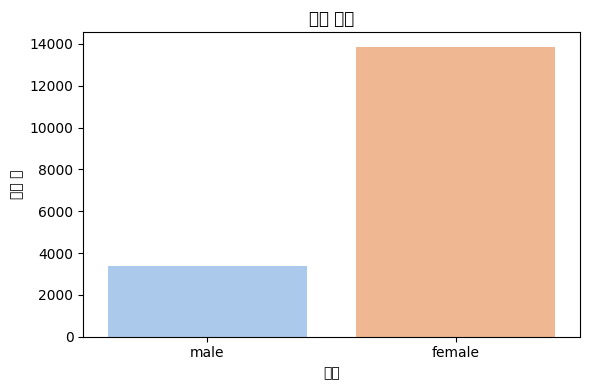

C:\Users\asia\AppData\Local\Temp\ipykernel_19568\3994598004.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="나이", order=sorted(df["나이"].unique()), palette="pastel")
C:\Users\asia\AppData\Local\Temp\ipykernel_19568\3994598004.py:23: UserWarning: Glyph 45208 (\N{HANGUL SYLLABLE NA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\asia\AppData\Local\Temp\ipykernel_19568\3994598004.py:23: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\asia\AppData\Local\Temp\ipykernel_19568\3994598004.py:23: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\asia\AppData\Local\Temp\ipykernel_19568\3994598004.py:23: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from font(s) DejaVu Sans

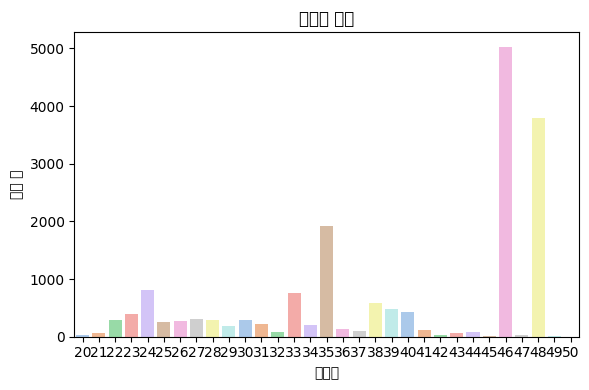

C:\Users\asia\AppData\Local\Temp\ipykernel_19568\3994598004.py:33: UserWarning: Glyph 45208 (\N{HANGUL SYLLABLE NA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\asia\AppData\Local\Temp\ipykernel_19568\3994598004.py:33: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\asia\AppData\Local\Temp\ipykernel_19568\3994598004.py:33: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\asia\AppData\Local\Temp\ipykernel_19568\3994598004.py:33: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\asia\AppData\Local\Temp\ipykernel_19568\3994598004.py:33: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\asia\AppData\Local\Temp\ipykernel_19568\3994598004.py:33: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) D

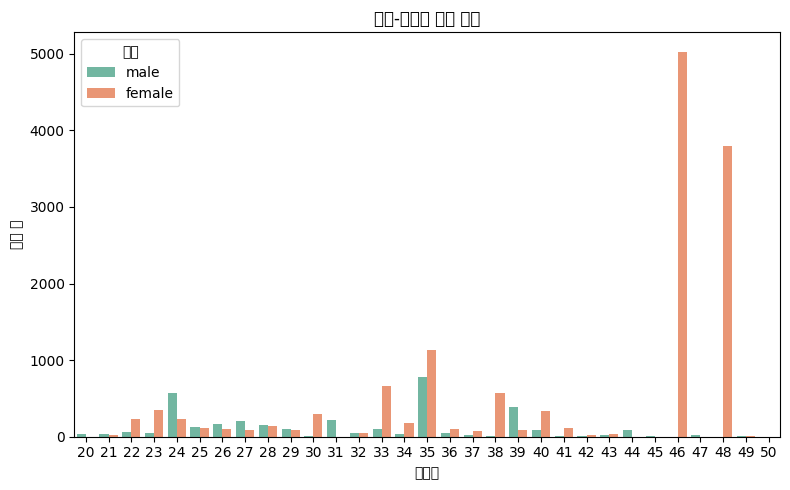

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CSV 파일 로드
df = pd.read_csv("aihub_emotion_preprocessed_cleaned.csv")

# 1. 성별 분포 시각화
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="성별", palette="pastel")
plt.title("성별 분포")
plt.xlabel("성별")
plt.ylabel("화자 수")
plt.tight_layout()
plt.show()

# 2. 나이대 분포 시각화
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="나이", order=sorted(df["나이"].unique()), palette="pastel")
plt.title("나이대 분포")
plt.xlabel("나이대")
plt.ylabel("화자 수")
plt.tight_layout()
plt.show()

# 3. 성별-나이대 교차 분포 시각화
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="나이", hue="성별", order=sorted(df["나이"].unique()), palette="Set2")
plt.title("성별-나이대 교차 분포")
plt.xlabel("나이대")
plt.ylabel("화자 수")
plt.legend(title="성별")
plt.tight_layout()
plt.show()

In [26]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="성별", palette="pastel")
plt.title("성별 분포")
plt.xlabel("성별")
plt.ylabel("화자 수")
plt.tight_layout()
plt.savefig("gender_distribution.png", dpi=300)
plt.close()

C:\Users\asia\AppData\Local\Temp\ipykernel_19568\2293879226.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="성별", palette="pastel")
C:\Users\asia\AppData\Local\Temp\ipykernel_19568\2293879226.py:6: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\asia\AppData\Local\Temp\ipykernel_19568\2293879226.py:6: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\asia\AppData\Local\Temp\ipykernel_19568\2293879226.py:6: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\asia\AppData\Local\Temp\ipykernel_19568\2293879226.py:6: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\

In [28]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="나이", order=sorted(df["나이"].unique()), palette="pastel")
plt.title("나이 분포")
plt.xlabel("나이")
plt.ylabel("화자 수")
plt.tight_layout()
plt.savefig("age_distribution.png", dpi=300)
plt.close()

C:\Users\asia\AppData\Local\Temp\ipykernel_19568\3777077647.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="나이", order=sorted(df["나이"].unique()), palette="pastel")
C:\Users\asia\AppData\Local\Temp\ipykernel_19568\3777077647.py:6: UserWarning: Glyph 45208 (\N{HANGUL SYLLABLE NA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\asia\AppData\Local\Temp\ipykernel_19568\3777077647.py:6: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\asia\AppData\Local\Temp\ipykernel_19568\3777077647.py:6: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\asia\AppData\Local\Temp\ipykernel_19568\3777077647.py:6: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) DejaVu Sans.
  pl

In [29]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="나이", hue="성별", order=sorted(df["나이"].unique()), palette="Set2")
plt.title("성별-나이대 교차 분포")
plt.xlabel("나이대")
plt.ylabel("화자 수")
plt.legend(title="성별")
plt.tight_layout()
plt.savefig("gender_age_cross_distribution.png", dpi=300)
plt.close()

C:\Users\asia\AppData\Local\Temp\ipykernel_19568\522467718.py:7: UserWarning: Glyph 45208 (\N{HANGUL SYLLABLE NA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\asia\AppData\Local\Temp\ipykernel_19568\522467718.py:7: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\asia\AppData\Local\Temp\ipykernel_19568\522467718.py:7: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\asia\AppData\Local\Temp\ipykernel_19568\522467718.py:7: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\asia\AppData\Local\Temp\ipykernel_19568\522467718.py:7: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\asia\AppData\Local\Temp\ipykernel_19568\522467718.py:7: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
